In [39]:
import random
import seaborn as sns

In [40]:
# Constantes

# Valores del diccionario
SITIO_INICIAL = 'Inicial'
SITIO_ASIGNADO = 'Asignado'
ORDEN_LLEGADA = 'Orden'

# Alumnos primero y último en llegar
PRIMERO = "Isabel"
ULTIMO = "Ramón"


In [41]:
# creamos una lista con los alumnos
def crear_alumnos(numero):
    alumnosn = []
    alumnosn = [str(n) for n in range(numero - 2)]
    
    alumnosn.append(PRIMERO)
    alumnosn.append(ULTIMO)
    
    #alumnosn = ["Maria", "Pedro", "Alfredo", "Isabel", "Ramon", "Pilar", "Jorge","Rosa", "Elena",  \
    #           "Antonia", "Marta", "Daniel", "Francisco" ,"Josefa" ,"Aurora"]
    
    return alumnosn


In [42]:
# creamos una lista con el número de sitios
def crear_sitios(numero):
    sitiosn = [n for n in range(numero)]
    
    return sitiosn

In [43]:
# asignamos los alumnos a los sitios de forma aleatoria
def asignar_sitios(alumnos, sitios):
    # diccionario {alumno: {sitio inicial, orden llegada, sitio escogido}}
    alumnossitiosn = {}
    
    # creamos una copia de los sitios, para no alterarla
    sitiost = sitios[:]

    # para cada alumno, elegimos un puesto y lo guardamos en un diccionario
    for a in alumnos:
        # elegimos el puesto al azar
        sitio = random.choice(sitiost)
        # eliminamos el puesto tratado - validar que no existan duplicados antes
        sitiost.remove(sitio)
        
        # actualizamos el diccionario
        sitiosorden = {}
       
        sitiosorden[SITIO_INICIAL] = sitio        
        sitiosorden[ORDEN_LLEGADA] = 0  
        sitiosorden[SITIO_ASIGNADO] = 0  

        alumnossitiosn[a] = sitiosorden
    
    # retornamos el diccionario
    return alumnossitiosn


In [44]:
# Registramos la asistencia de los alumnos a la clase
def registrar_asistencia(alumnos, sitios, alumnossitios):
    # Alumnos matriculados
    alumnosmatriculados = alumnos[:]

    # Sitios disponibles
    sitiosdisponibles = sitios[:]

    # Orden de llegada
    ordendellegada = 0

    # Primero vamos a registrar la llegada de los alumnos, y posteriormente
    # aplicamos el algoritmo de búsqueda de sitio, así queda más sencillo
    # si necesitamos registrarlos según van llegando, habria que modificarlo
    
    
    # Registra la llegada de los alumnos
    alumnosregistrados = registrar_llegada(alumnosmatriculados)
       
    # Vamos colocando a los alumnos según han llegado en la lista
    for alumno in alumnosregistrados:
        # buscamos el sitio inicial del alumno
        sitioinicial = alumnossitios[alumno][SITIO_INICIAL]
    
        # en el caso del primer alumno, siempre elegimos al azar, sin buscar
        # previamente su sitio
        if alumno == PRIMERO:
            buscasusitio = False
        else:
            buscasusitio = True
        
        sitioselecccionado = buscar_sitio(sitioinicial, sitiosdisponibles, buscasusitio)

        # actualizamos la llegada del alumno
        alumnossitios[alumno][ORDEN_LLEGADA] = ordendellegada
        alumnossitios[alumno][SITIO_ASIGNADO] = sitioselecccionado
    
        # eliminamos el sitio elegido
        sitiosdisponibles.remove(sitioselecccionado)
        
        # actualizamos el orden de llegada
        ordendellegada += 1
        

In [45]:
def registrar_llegada(alumnosmatriculados):
    # Lista con el orden de llegada de los alumnos
    alumnosr = []
    
    # Pool de alumnos a calcular, eliminando el primero y el último que son fijos
    alumnosacalcular = alumnosmatriculados[:]
    alumnosacalcular.remove(PRIMERO)
    alumnosacalcular.remove(ULTIMO)
    
    # Registramos al primer alumno
    alumnosr.append(PRIMERO)
    
    # Registramos al resto de alumnos por sorteo
    existenalumnos = True
    
    while existenalumnos:
        alumnosorteado = random.choice(alumnosacalcular)
        alumnosr.append(alumnosorteado)
        alumnosacalcular.remove(alumnosorteado)
    
        if len(alumnosacalcular) == 0:
            existenalumnos = False
    
    
    # Registramos al último alumno
    alumnosr.append(ULTIMO)
    
    # Devolvemos la lista con los alumnos registrados por orden de llegada
    return alumnosr 
    

In [46]:
def buscar_sitio(sitioinicial, sitiosdisponibles, buscasusitio):
    # sitio inicial
    sitioe = 0
    
    # si el puesto está disponible, lo seleccionamos
    if sitioinicial in sitiosdisponibles and buscasusitio:
        sitioe = sitioinicial

    # si el puesto no está disponible, elegimos un de los disponibles al azar
    else:
        sitioe = random.choice(sitiosdisponibles)        
    
    return sitioe


In [47]:
""" 
    Experimento: para un número de alumnos predefinidos, que tienen un sitio preestablecido, siempre existe 
    uno que llega el primero y otro el último. El primero que llega se sienta donde le parece y el resto,  
    según van llegando, intentan sentarse en su sitio, y si esta ocupado, se sientan en otro al azar. 
    
    El último siempre se sienta en el sitio que queda libre. Si el sitio libre es el suyo preestablecido,
    lo consideramos un acierto
    
    Registramos 100 asistencias a clase y retornamos aciertos/asistencias
    
"""

def experimento():
    # Número de alumnos
    numeroalumnos = 15

    # Asistencias a registrar
    asistencias  = 100
    
    # Creamos los alumnos
    alumnos = crear_alumnos(numeroalumnos)

    # Creamos los sitios
    sitios = crear_sitios(numeroalumnos)

    # Asignamos sitios iniciales a los alumnos
    alumnossitios = asignar_sitios(alumnos, sitios)
    
    # Aciertos sobre si el último se sienta en su sitio
    aciertos = 0
    
    # Registramos las asistencias a clase
    for a in range(asistencias):
        # Asistencia
        registrar_asistencia(alumnos, sitios, alumnossitios)        

        # Comprobamos si el último se ha ha sentado en su sitio inicial
        if alumnossitios[ULTIMO][SITIO_INICIAL] == alumnossitios[ULTIMO][SITIO_ASIGNADO]:
            aciertos += 1

    # Retornamos aciertos/asistencias
    return aciertos/asistencias


In [48]:
# Lanzamos el experimento N veces para comprobar su estabilidad
experimentos = [experimento() for n in range(200)]

/home/alberto/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


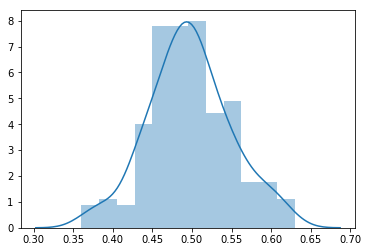

In [49]:
# Representamos gráficamente el resultado
sns.distplot(experimentos)